### Put this code instead of cell 13 in the SentimentAnalysis notebook (Sentiment distribution plot) https://github.com/nklingen/SocialGraphsProject/blob/main/Sentiment_analysis.ipynb :

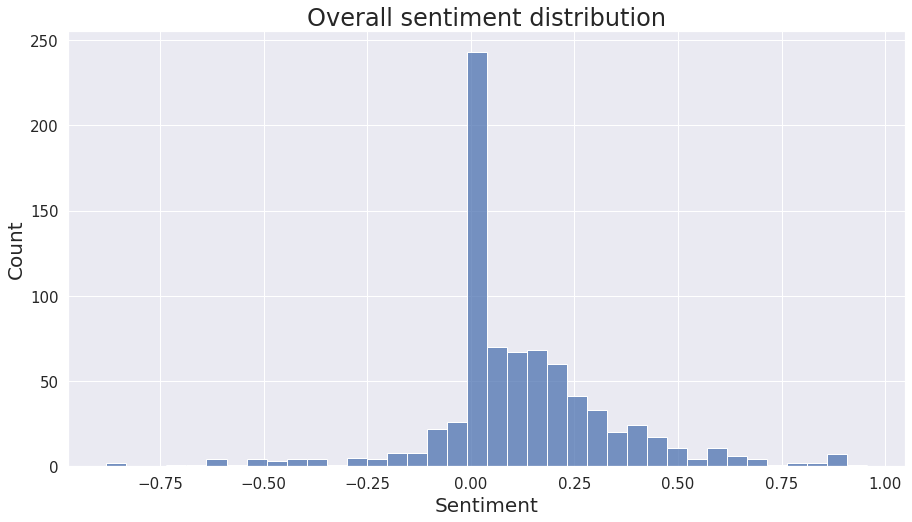

In [47]:
sns.set_theme()
title = "Overall sentiment distribution"
plt.figure(figsize=[15,8])
sns.histplot(char_sentiment_VADER)
plt.title(title,fontname = 'Open Sans',fontsize=24)
plt.xticks(fontname = 'Open Sans',fontsize=15)
plt.yticks(fontname = 'Open Sans',fontsize=15)
plt.xlabel('Sentiment', fontsize=20,fontname = 'Open Sans',labelpad=5)
plt.ylabel('Count',fontsize=20,fontname = 'Open Sans')
plt.savefig("sentiment_distribution.png")
plt.show()

### Put this code instead of cell 18 in the SentimentAnalysis notebook (Average sentiment for characters plot):

C:\Users\Oliver\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



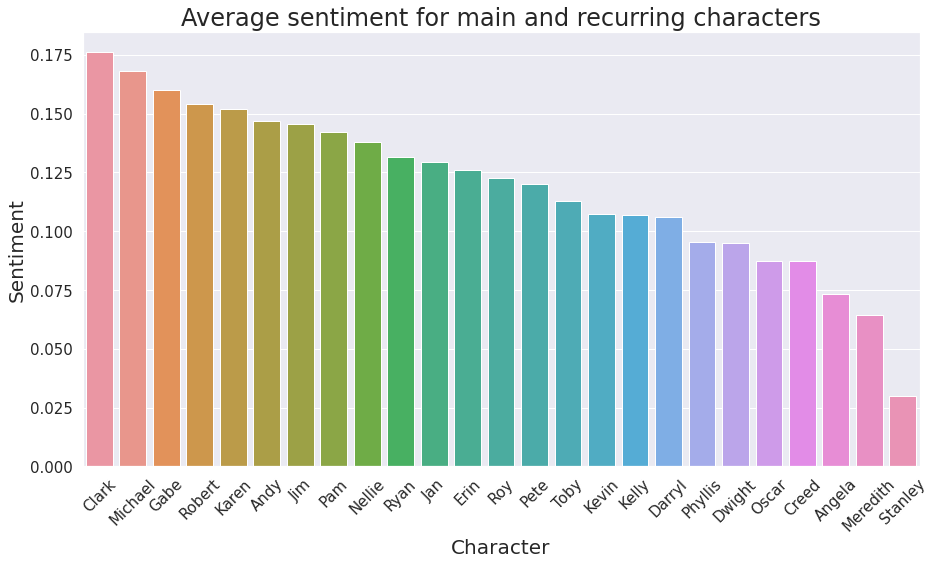

In [52]:
plt.figure(figsize=[15,8])
main_char_sentiments = {char:char_sentiment_VADER[char] for char in main_characters}
main_char_sentiments = dict(sorted(main_char_sentiments.items(), key=lambda item: item[1], reverse = True))
x = list(main_char_sentiments.keys())
y = list(main_char_sentiments.values())
sns.barplot(x,y)
plt.title("Average sentiment for main and recurring characters",fontname = 'Open Sans',fontsize=24)
plt.xticks(rotation=45, fontname = 'Open Sans',fontsize=15)
plt.yticks(fontname = 'Open Sans',fontsize=15)
plt.xlabel('Character', fontsize=20,fontname = 'Open Sans',labelpad=5)
plt.ylabel('Sentiment',fontsize=20,fontname = 'Open Sans')
plt.savefig("sentiment_per_character.png")
plt.show()

### Put this code instead of cell 20 in the SentimentAnalysis notebook (Interactive sentiment development over seasons plot):

In [57]:
import plotly.express as px
import plotly.graph_objects as go
sentiments = {character:get_sentiment_season(character) for character in characters_sentiment}
data = pd.DataFrame({character:sentiments[character]["sentiment"] for character in characters_sentiment}, index = list(range(1,10)))
data=data.replace(0.271150, np.NaN)
fig1 = px.scatter(data,x=data.reset_index().index,y=['Michael', 'Dwight', 'Andy', 'Pam', 'Jim'])
fig2 = px.line(data,x=data.reset_index().index,y=['Michael', 'Dwight', 'Andy', 'Pam', 'Jim'])
fig2.update_layout(showlegend=False)
fig3 = go.Figure(data=fig1.data + fig2.data)
fig3.update_layout(title_text='Sentiment developement of main characters throughout the seasons',title_x=0.5,title_font_size=22)
fig3.update_layout(xaxis_title="Season number",yaxis_title="Sentiment",font=dict(size=16))
fig3.update_layout(yaxis = dict(tickfont = dict(size=16)),xaxis = dict(tickfont = dict(size=16)))
fig3.for_each_xaxis(lambda axis: axis.title.update(font=dict(size=18)))
fig3.for_each_yaxis(lambda axis: axis.title.update(font=dict(size=18)))
fig3.update_layout(go.Layout(margin=go.layout.Margin(l=0,r=30,b=30, t=35)))
fig3.update_layout(dict(xaxis=dict(tickmode="array",tickvals=[0,1,2,3,4,5,6,7,8], ticktext=[1,2,3,4,5,6,7,8,9],)))
fig3.update_xaxes(range=[-0.2,8.2])
fig3.update_traces(line=dict(width=3))
fig3.update_traces(marker=dict(size=8))
fig3.update_layout(showlegend=False)
fig3.add_annotation(xref="x domain",yref="y",x=0.625,y=0.16,text="Michael",
    axref="x domain", font_color = "white", bgcolor="#636EFA",font_size=15,height=20, ayref="y", ax=0.63,ay=0.82,showarrow=False)
fig3.add_annotation(xref="x domain",yref="y",x=0.795,y=0.09,text="Dwight",
    axref="x domain",font_color = "white",bgcolor="#EF553B",font_size=15,height=20, ayref="y", ax=0.63,ay=0.82,arrowhead=4,showarrow=False)
fig3.add_annotation(xref="x domain",yref="y",x=0.349,y=0.157,text="Andy",
    axref="x domain", font_color = "white",bgcolor="#00CC96",font_size=15,height=20, ayref="y", ax=0.46,ay=0.96,arrowhead=4,showarrow=False)
fig3.add_annotation(xref="x domain",yref="y",x=0.93,y=0.181,text="Pam",
    axref="x domain", font_color = "white",bgcolor="#AB63FA",font_size=15,height=20, ayref="y", ax=0.94,ay=0.53,arrowhead=4,showarrow=False)
fig3.add_annotation(xref="x domain",yref="y",x=0.24,y=0.12,text="Jim",
    axref="x domain", font_color = "white",bgcolor="#FFA15A",font_size=15,height=20, ayref="y", ax=0.94,ay=0.53,arrowhead=4,showarrow=False)
fig3.show()

### Put this code instead of cell 52 in the SentimentAnalysis notebook (Interactive sentiment analysis for main characters for every episode plot):

In [136]:
import plotly.graph_objects as go
#Create an interactive plot of sentiment analysis of main characters per episode
traces = []
buttons = []
for col in data.columns:
    traces.append(go.Scatter(x=data.reset_index().index,y=data[col],visible=True,name=col))
    buttons.append(dict(method='restyle',label=col,visible=True,args=[{'visible':True},[i for i,x in enumerate(traces) if x.name == col]],args2=[{'visible':'legendonly'},[i for i,x in enumerate(traces) if x.name == col]]))
allButton = [dict(method='restyle',label="All",visible=True,args=[{'visible':True}],args2=[{'visible':'legendonly'}])]

layout = go.Layout(updatemenus=[dict(type='buttons',direction='right',x=0.46,y=0.95,showactive=True,buttons=allButton + buttons)],title=dict(text='Sentiment analysis of main characters for every The Office episode',x=0.5),showlegend=True)
fig = go.Figure(data=traces,layout=layout)
fig.update_xaxes(range=[-1,187])
fig.update_layout(yaxis = dict(tickfont = dict(size=14.5)),xaxis = dict(tickfont = dict(size=14.5)))
fig.update_yaxes(range=[-0.28, 0.8])
fig.update_traces(line=dict(width=2.5))
fig.update_layout(legend=dict(yanchor="top",y=0.99,xanchor="right",x=0.99))
fig.update_layout(go.Layout(margin=go.layout.Margin(l=0, r=30, b=30, t=35)))
fig.update_layout(title_text='Sentiment analysis of main characters per episode',title_x=0.5,title_font_size=22)
fig.update_layout(xaxis_title="Episode",yaxis_title="Sentiment",font=dict(size=16))
fig.update_layout(yaxis = dict(tickfont = dict(size=16)),xaxis = dict(tickfont = dict(size=16)))
fig.for_each_xaxis(lambda axis: axis.title.update(font=dict(size=18)))
fig.for_each_yaxis(lambda axis: axis.title.update(font=dict(size=18)))
fig.add_annotation(xref="x domain",yref="y",x=0.699,y=0.74,text="Threat Level <br> Midnight",
    axref="x domain", bgcolor="white",font_size=13,height=35, ayref="y", ax=0.77,ay=0.73,arrowhead=4,)
fig.add_annotation(xref="x domain",yref="y",x=0.577,y=0.66,text="St. Patrick's Day",
    axref="x domain", bgcolor="white",font_size=13,height=15, ayref="y", ax=0.6,ay=0.73,arrowhead=4,)
fig.add_annotation(xref="x domain",yref="y",x=0.549,y=0.62,text="The Banker",
    axref="x domain", bgcolor="white",font_size=13,height=15, ayref="y", ax=0.46,ay=0.59,arrowhead=4,)
fig.add_annotation(xref="x domain",yref="y",x=0.327,y=0.5,text="Night Out",
    axref="x domain", bgcolor="white",font_size=13,height=15, ayref="y", ax=0.25,ay=0.53,arrowhead=4,)
fig.add_annotation(xref="x domain",yref="y",x=0.178,y=-0.21,text="Diwali",
    axref="x domain", bgcolor="white",font_size=13,height=15, ayref="y", ax=0.12,ay=-0.2,arrowhead=4,)
fig.add_annotation(xref="x domain",yref="y",x=0.245,y=-0.118,text="The Negotiation",
    axref="x domain", bgcolor="white",font_size=13,height=15, ayref="y", ax=0.26,ay=-0.2,arrowhead=4,)
fig.add_annotation(xref="x domain",yref="y",x=0.768,y=-0.134,text="Spooked",
    axref="x domain", bgcolor="white",font_size=13,height=15, ayref="y", ax=0.86,ay=-0.13,arrowhead=4,)
fig.add_annotation(xref="x domain",yref="y",x=0.73,y=-0.174,text="Dwight K. Schrute,<br>(Acting) Manager",
    axref="x domain", bgcolor="white",font_size=13,height=35, ayref="y", ax=0.62,ay=-0.18,arrowhead=4,)
fig.show()
fig.write_html("sentiment_analysis_per_episode.html")

### Put this code instead of cell 29 in the SentimentAnalysis notebook (Sentiment boxplots for the main characters):

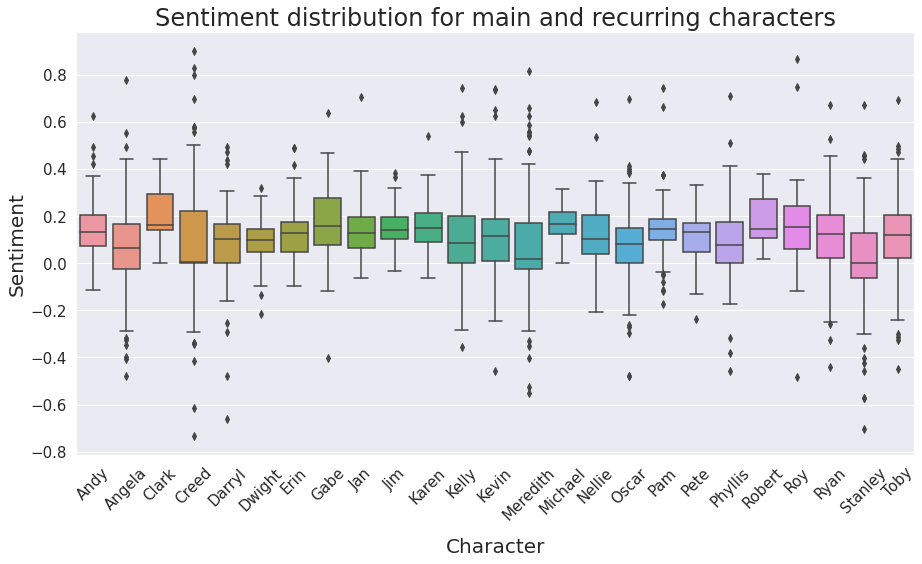

In [34]:
plt.figure(figsize=[13,8])
sns.boxplot(data=df, showmeans=False, meanprops={"marker":"x",
                       "markerfacecolor":"black", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.title("Sentiment distribution for main and recurring characters",fontname = 'Open Sans',fontsize=24)
plt.xticks(rotation=45, fontname = 'Open Sans',fontsize=15)
plt.yticks(fontname = 'Open Sans',fontsize=15)
plt.xlabel('Character', fontsize=20,fontname = 'Open Sans',labelpad=15)
plt.ylabel('Sentiment',fontsize=20,fontname = 'Open Sans')
plt.tight_layout()
#folder="C:/Users/Oliver/Documents/DTU/Masters/Social data analysis and visualization"
plt.savefig("sentiment_distribution_boxplot.png")
plt.show()

### Put this code instead of cell 30 in the SentimentAnalysis notebook:

In [35]:
sentiment_by_episode = {}

for episode in episodes:
    season,ep = episode
    
    df_ep = df_dialog[(df_dialog.season == season) & (df_dialog.episode == ep)]
    lines = df_ep.line_text
    
    total = []
    analyzer = SentimentIntensityAnalyzer()       

    for sentence in list(lines):
        # compute the polarity score
        vs = analyzer.polarity_scores(str(sentence))
        total.append(vs["compound"])
        
    sentiment_by_episode[episode] = sum(total)/len(lines)   
    
    sentiment_by_episode = dict(sorted(sentiment_by_episode.items(), key=lambda item: item[0], reverse = False))

### Put this code instead of cell 50 in the SentimentAnalysis notebook (Average sentiment per episode plot):

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
sentiment_df = pd.DataFrame({'Episode': list(range(len(sentiment_by_episode))),'Sentiment': list(sentiment_by_episode.values()),})
fig4 = px.line(sentiment_df,x='Episode',y='Sentiment')
fig4.update_layout(title_text='Ratings for each season')
fig4.update_traces(marker=dict(color='black',size=5,line=dict(width=2, color='black')), selector=dict(mode='markers'))
fig4.update_layout(title_text='Combined average sentiment per episode',title_x=0.5,title_font_size=22)
fig4.update_layout(yaxis = dict(tickfont = dict(size=16)),xaxis = dict(tickfont = dict(size=16)))
fig4.for_each_xaxis(lambda axis: axis.title.update(font=dict(size=18)))
fig4.for_each_yaxis(lambda axis: axis.title.update(font=dict(size=18)))
fig4.update_xaxes(range=[-1,187])
fig4.update_layout(yaxis = dict(tickfont = dict(size=14.5)),xaxis = dict(tickfont = dict(size=14.5)))
fig4.update_yaxes(range=[-0.01, 0.25])
fig4.update_traces(line=dict(width=2.5))
fig4.add_traces(go.Scatter(x=[99,130], y=[0.00549,0.2355], mode="markers", hoverinfo="skip"))
fig4.update_traces(marker=dict(color='black',size=5,line=dict(width=2, color='black')), selector=dict(mode='markers'))
fig4.update_traces(line=dict(width=2.5))
fig4.update_layout(go.Layout(
  margin=go.layout.Margin(l=0, r=30, b=30, t=35)))
fig4.add_annotation(xref="x domain",yref="y",x=0.695,y=0.235,text="Threat Level <br> Midnight",
    axref="x domain", bgcolor="white",font_size=13,height=35, ayref="y", ax=0.78,ay=0.23,arrowhead=4,)
fig4.add_annotation(xref="x domain",yref="y",x=0.521,y=0.005,text="Murder",
    axref="x domain", bgcolor="white",font_size=13,height=15, ayref="y", ax=0.46,ay=0.015,arrowhead=4,)
fig4.update_layout(showlegend=False)
fig4.update_xaxes(range=[0,188])
fig4.update_traces(marker=dict(color='black',size=5,line=dict(width=2, color='black')), selector=dict(mode='markers'))
fig4.show()